In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import Flatten

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from keras.constraints import maxnorm
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import time
import warnings
warnings.filterwarnings("ignore")
import pickle


In [4]:
path = './final_tidy_reddits_lemmetized.csv'
df = pd.read_csv(path)

In [5]:
df.shape

(115033, 5)

In [6]:
df.sample(7)

,Unnamed: 0,label,text,lemmatized,tokens_back_to_text
91331,91331,depression,"['tiring', 'people', 'understand', 'repeat', '...","['tire', 'people', 'understand', 'repeat', 'mi...",tire people understand repeat mistake know sel...
26556,26556,Anxiety,"['im', 'diagnosed', 'like', 'appointments', 'e...","['im', 'diagnose', 'like', 'appointment', 'eve...",im diagnose like appointment even sure anxiety...
93975,93975,depression,"['im', 'yo', 'guy', 'current', 'state', 'life'...","['im', 'yo', 'guy', 'current', 'state', 'life'...",im yo guy current state life nothing feel enjo...
109700,109700,depression,"['ok', 'acknowledge', 'life', 'ever', 'point',...","['ok', 'acknowledge', 'life', 'ever', 'point',...",ok acknowledge life ever point mean people lik...
79480,79480,depression,"['thought', 'venting', 'someone', 'would', 'go...","['thought', 'vent', 'someone', 'would', 'good'...",thought vent someone would good broken mind ta...
106336,106336,depression,"['deal', 'lack', 'motivation', 'perspective', ...","['deal', 'lack', 'motivation', 'perspective', ...",deal lack motivation perspective future basica...
54672,54672,depression,"['sure', 'best', 'place', 'post', 'look', 'pos...","['sure', 'best', 'place', 'post', 'look', 'pos...",sure best place post look post history see sui...


In [8]:
df.drop(columns = ['Unnamed: 0'],  inplace=True)

In [9]:
df.sample(10)

,label,text,lemmatized,tokens_back_to_text
15149,Anxiety,"['anxious', 'thoughts', 'social', 'interaction...","['anxious', 'thought', 'social', 'interaction'...",anxious thought social interaction regular bas...
34589,Anxiety,"['bad', 'sometimes', 'im', 'happy', 'sudden', ...","['bad', 'sometimes', 'im', 'happy', 'sudden', ...",bad sometimes im happy sudden kind feel ever r...
43042,bipolar,"['diagnosed', 'bipolar', 'type', 'mixed', 'rap...","['diagnose', 'bipolar', 'type', 'mixed', 'rapi...",diagnose bipolar type mixed rapid cycling epis...
61216,depression,"['maybe', 'im', 'lil', 'shit', 'shitty', 'pers...","['maybe', 'im', 'lil', 'shit', 'shitty', 'pers...",maybe im lil shit shitty person past maybe wor...
40320,bipolar,"['like', 'medicated', 'get', 'point', 'think',...","['like', 'medicate', 'get', 'point', 'think', ...",like medicate get point think med make still c...
110148,depression,"['ive', 'anxiety', 'meds', 'years', 'seeing', ...","['ive', 'anxiety', 'med', 'year', 'see', 'ther...",ive anxiety med year see therapist twice month...
61858,depression,"['family', 'went', 'brazil', 'thought', 'grand...","['family', 'go', 'brazil', 'thought', 'grandpa...",family go brazil thought grandpa gon na die tu...
100834,depression,"['enough', 'already', 'feel', 'like', 'seen', ...","['enough', 'already', 'feel', 'like', 'see', '...",enough already feel like see everything life g...
65085,depression,"['anyone', 'every', 'feel', 'like', 'done', 'e...","['anyone', 'every', 'feel', 'like', 'do', 'eve...",anyone every feel like do everything im tire p...
112490,depression,"['friends', 'rapidly', 'progressing', 'life', ...","['friend', 'rapidly', 'progress', 'life', 'pro...",friend rapidly progress life probably ever tru...


In [10]:
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

In [11]:
df.isna().sum()

label                  0
text                   0
lemmatized             0
tokens_back_to_text    6
dtype: int64

In [12]:
reddits = list(df['tokens_back_to_text'])
type(reddits)

list

In [13]:
len(reddits)

115033

In [14]:
df['label'].value_counts()

depression    69217
Anxiety       36257
bipolar        9559
Name: label, dtype: int64

In [15]:
df['label'] = np.where(df['label']=='Anxiety',1,0)

In [16]:
df.head(3)

,label,text,lemmatized,tokens_back_to_text
0,1,"['smirk', 'face', 'like', 'im', 'high', 'feel', 'pretty', 'good', 'longer', 'feel', 'anxious', 'im', 'peering', 'behind', 'back', 'every', 'second', 'didnt', 'expect', 'feel', 'good', 'anyone', 'ideas', 'propranolol', 'making', 'feel', 'somewhat', 'high']","['smirk', 'face', 'like', 'im', 'high', 'feel', 'pretty', 'good', 'longer', 'feel', 'anxious', 'im', 'peer', 'behind', 'back', 'every', 'second', 'didnt', 'expect', 'feel', 'good', 'anyone', 'idea', 'propranolol', 'make', 'feel', 'somewhat', 'high']",smirk face like im high feel pretty good longer feel anxious im peer behind back every second didnt expect feel good anyone idea propranolol make feel somewhat high
1,1,"['minutes', 'ago', 'posted', 'something', 'another', 'subreddit', 'convince', 'minutes', 'good', 'post', 'finally', 'posted', 'suddenly', 'got', 'anxious', 'like', 'anxious', 'could', 'hear', 'heart', 'beating', 'started', 'breath', 'faster', 'etc', 'end', 'deleted', 'post', 'happened', 'many', 'times', 'often', 'writing', 'something', 'group', 'chats', 'strangers', 'discord', 'generally', 'posting', 'comment', 'social', 'media', 'commenting', 'friends', 'post', 'sth', 'like', 'even', 'chatting', 'people', 'online', 'makes', 'uncomfortable', 'think', 'might', 'react', 'way', 'might', 'afraid', 'rejection', 'feeling', 'left', 'someone', 'responding', 'liking', 'confuses', 'feel', 'way', 'irl', 'good', 'friends', 'never', 'dealt', 'rejection', 'since', 'sociable', 'also', 'dont', 'really', 'care', 'people', 'think', 'reason', 'really', 'seems', 'bother', 'particular', 'situations', 'anyone', 'advice', 'overcome', 'fear', 'btw', 'dont', 'feel', 'way', 'asking', 'help', 'like', 'right', 'diagnosed', 'anxiety', 'disorder', 'think', 'one', 'either', 'looking', 'advice', 'subreddit', 'anxious', 'posting', 'reddit', 'group', 'chats']","['minute', 'ago', 'post', 'something', 'another', 'subreddit', 'convince', 'minute', 'good', 'post', 'finally', 'post', 'suddenly', 'get', 'anxious', 'like', 'anxious', 'could', 'hear', 'heart', 'beating', 'start', 'breath', 'faster', 'etc', 'end', 'delete', 'post', 'happen', 'many', 'time', 'often', 'write', 'something', 'group', 'chat', 'stranger', 'discord', 'generally', 'post', 'comment', 'social', 'medium', 'comment', 'friend', 'post', 'sth', 'like', 'even', 'chat', 'people', 'online', 'make', 'uncomfortable', 'think', 'might', 'react', 'way', 'might', 'afraid', 'rejection', 'feel', 'left', 'someone', 'respond', 'like', 'confuses', 'feel', 'way', 'irl', 'good', 'friend', 'never', 'dealt', 'rejection', 'since', 'sociable', 'also', 'dont', 'really', 'care', 'people', 'think', 'reason', 'really', 'seem', 'bother', 'particular', 'situation', 'anyone', 'advice', 'overcome', 'fear', 'btw', 'dont', 'feel', 'way', 'ask', 'help', 'like', 'right', 'diagnose', 'anxiety', 'disorder', 'think', 'one', 'either', 'look', 'advice', 'subreddit', 'anxious', 'post', 'reddit', 'group', 'chat']",minute ago post something another subreddit convince minute good post finally post suddenly get anxious like anxious could hear heart beating start breath faster etc end delete post happen many time often write something group chat stranger discord generally post comment social medium comment friend post sth like even chat people online make uncomfortable think might react way might afraid rejection feel left someone respond like confuses feel way irl good friend never dealt rejection since sociable also dont really care people think reason really seem bother particular situation anyone advice overcome fear btw dont feel way ask help like right diagnose anxiety disorder think one either look advice subreddit anxious post reddit group chat
2,1,"['feel', 'anxious', 'college', 'body', 'started', 'showing', 'signs', 'heat', 'chest', 'think', 'lot', 'makes', 'anxious', 'afraid', 'go', 'college', 'especially', 'pandemic', 'need', 'group', 'fit', 'feel', 'anxious', 'college']","['feel', 'anxious', 'college', 'body', 'start

In [17]:
df['label'].value_counts()

0    78776
1    36257
Name: label, dtype: int64

## **Feature extraction**

In [19]:
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([str(x) for x in reddits])

In [20]:
word_index = tokenizer.word_index
print('WE HAVE %s UNIQUE TOKENS.' % len(word_index))

WE HAVE 57670 UNIQUE TOKENS.


In [22]:
sequences = tokenizer.texts_to_sequences([str(x) for x in reddits])

In [49]:
with open('anxiety.sequences.pkl', 'wb') as f:
    pickle.dump(sequences, f, protocol=pickle.HIGHEST_PROTOCOL)


In [23]:
# pad redddits to a max length of 150 words
maxlen = 150
X = pad_sequences(sequences, maxlen = maxlen)
X.shape

(115033, 150)

In [24]:
y = df['label']

##Split the dataset into **training** and **test** sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((92026, 150), (23007, 150), (92026,), (23007,))

In [28]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Defining the **Convolutional Neural Network Model**

In [29]:
# Prepare hyperparameters of CNN
vocab_size = len(word_index) + 1
# output_dim = 32

In [30]:
# Building the CNN Model
model = Sequential()

model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())

model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

### Visualizing the CNN Model

In [32]:
!pip install pydot
!pip install graphviz

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7381888   
                                                                 
 conv1d (Conv1D)             (None, 150, 128)          49280     
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 dense (Dense)               (None, 250)               1200250   
                                                        

### Using the **Adam optimizer** for the optimization and **Binary cross entropy** to calculate the Loss Function

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
start = time.time()

# fit the model to the training set
cnn_hist = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

# evaluation of the model on the test set
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")

end = time.time()
total = (end-start) // 60
print('Training duration : {} minutes'.format(total))

Epoch 1/5
2301/2301 [==============================] - 592s 257ms/step - loss: 0.2417 - accuracy: 0.9066 - val_loss: 0.2213 - val_accuracy: 0.9187
Epoch 2/5
2301/2301 [==============================] - 600s 261ms/step - loss: 0.1746 - accuracy: 0.9356 - val_loss: 0.2416 - val_accuracy: 0.9131
Epoch 3/5
2301/2301 [==============================] - 1252s 544ms/step - loss: 0.1269 - accuracy: 0.9539 - val_loss: 0.2813 - val_accuracy: 0.9036
Epoch 4/5
2301/2301 [==============================] - 620s 269ms/step - loss: 0.0785 - accuracy: 0.9721 - val_loss: 0.3568 - val_accuracy: 0.9000
Epoch 5/5
2301/2301 [==============================] - 618s 268ms/step - loss: 0.0464 - accuracy: 0.9839 - val_loss: 0.4660 - val_accuracy: 0.8944
Accuracy: 89.79%
Training duration : 61.0 minutes


In [37]:
history_dict = cnn_hist.history

## **Plotting the loss and the accuracy of both training and validation sets using the model history**

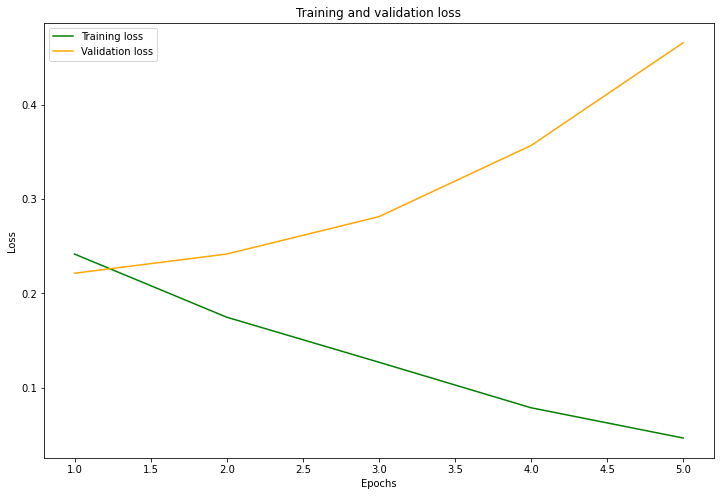

In [39]:
# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

# plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'green',label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

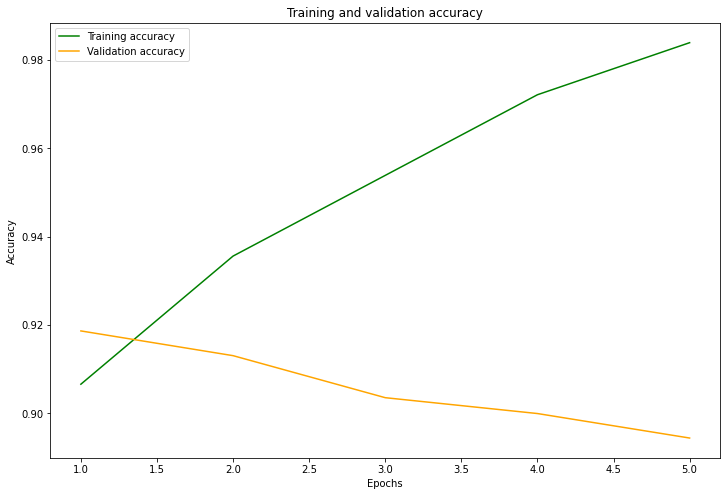

In [40]:
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'green',label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Confusion matrix**

In [41]:
preds = np.round(model.predict(X_test), 0)

719/719 [==============================] - 35s 47ms/step


In [43]:
cm = confusion_matrix(y_test, preds)

In [44]:
df_cm = pd.DataFrame(cm, index = ["anxiety", "non-anxiety"], columns = ["anxiety", "non-anxiety"])

Text(33.0, 0.5, 'Predicted Class')

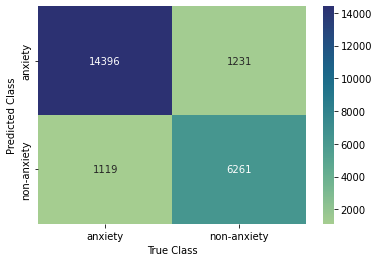

In [45]:
plt.figure(figsize=(6, 4))
sb.heatmap(df_cm, annot=True, cmap="crest", fmt='d')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

 Save to pickle file

In [48]:
with open('anxiety.model.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)


INFO:tensorflow:Assets written to: ram://708c7d11-5a50-4a1d-a508-b55611233828/assets


INFO:tensorflow:Assets written to: ram://708c7d11-5a50-4a1d-a508-b55611233828/assets
